In [4]:
%cd ..

c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Optimization algorithims\optimization_project_2024


C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import csv
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import normalize

from GeneralFormulas.Constraints import Check_QS_DV_Not_KS, Check_QG_CS, Check_RG_First_Part
from GeneralFormulas.Population import Random_Population
from GeneralFormulas.FitnessCalculation import Fitness_Population, Fitness_individual
from GeneralFormulas.Generalform_GA import Genetic_Algorithm

from Selection.FitnessProportional import Fitness_Proportional_Selection
from Selection.Rank import rank_selection
from Selection.SelfAdaptiveTournament import Self_Adaptive_Tournament_Selection
from Selection.Tournament import Tournament_Selection

from Crossovers.CX import CX
from Crossovers.OBX import OBX
from Crossovers.OX import OX
from Crossovers.PBX import PBX
from Crossovers.PMX import PMX

from Mutations.displacement import displacement
from Mutations.invert import invert_0point, invert_1point
from Mutations.scramble import scramble
from Mutations.swap import swap
from Mutations.Thrors import Thrors


from Datasets.random import random_dataset
from Datasets.player import player_dataset

2
     D  FC    G  QS  QG  CS  KS  RG  DV  SN
D    0  89   27  96   0  -8  65  29  44  38
FC  57   0   35   6  82  14  24  46  -9  18
G   69   1    0  -7   3   0  80  53  43  -8
QS  55  70   83   0  45  35  88  -3  16  90
QG  -6  65   37  74   0  12  69  17  84  36
CS  62  87  100  37  63   0  26  74  30  63
KS   0  94   50  12  81  51   0  65  91  47
RG  76  72   10  13  92  12  58   0  31  76
DV  94  56   15  64   4   0   2  44   0  -6
SN  62  25   63  25  95  65  32   3  37   0


In [6]:
%cd Test

c:\Users\luisb\OneDrive\Documentos\uni\Year 2\Semester 2\Optimization algorithims\optimization_project_2024\Test


C:\Users\luisb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Grid Search

### Initial Grid search

Problem: 69.3 millions combinations, years to run it if each combination takes only 1 min.

In [56]:
#colum_names = ["Seed", "Fitness Function", "Generation_index", "Population_size",
#               "Number_of_generations", "Elitism", "Dataset",
#               "Crosover", "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_all_results.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"], [random_dataset, "random"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"],
#                          [Fitness_Population(True, False), "Sharing sum"],
#                          [Fitness_Population(True, True), "Sharing mean"]],

#              'Crosovers': [[CX, "CX"], [OBX, "OBX"], [OX, "OX"],
#                            [PBX, "PBX"], [PMX, "PMX"]],  

#              'Selections': [[Fitness_Proportional_Selection, "Fit_Proportional"], 
#                             [rank_selection, "Rank"], [Tournament_Selection(2), "Tournament 2"],
#                             [Tournament_Selection(5), "Tournament 5"], [Tournament_Selection(10), "Tournament 10"],
#                             [Self_Adaptive_Tournament_Selection(25), "Self_Adaptive_Tournament 25"],
#                             [Self_Adaptive_Tournament_Selection(50), "Self_Adaptive_Tournament 50"]], 

#              'Mutations': [[displacement(2), "Displacement 2"], [displacement(3), "Displacement 3"],
#                            [displacement(4), "Displacement 4"], [displacement(5), "Displacement 5"],
#                            [scramble, "Scramble"], [swap, "Swap"], [invert_0point, "invert_0point"],
#                            [invert_1point, "invert_1point"], [Thrors(3), "Thrors 3"], 
#                            [Thrors(4), "Thrors 4"], [Thrors(5), "Thrors 5"]], 

#              'Seeds': list(range(0, 15)), 

#              'Population_size': list(range(100,1001,100)), 

#              'Number_of_generations': list(range(100,1001,100)), 

#              'P_crosover': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 

#              'Elitism': [True, False]} 

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])


**Solution:** Find the best parameters separately from less dependent to more dependent, reducing the complexity exponentially.

### Elitims

60 combinations to test, approximately 40 min to run.

In [57]:
#colum_names = ["Seed", "Fitness Function", "Generation_index",
#               "Population_size", "Number_of_generations",
#               "Elitism", "Dataset", "Crosover",
#               "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_Elitims.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"]],

#              'Crosovers': [[CX, "CX"]],

#              'Selections': [[Fitness_Proportional_Selection, "Fit_Proportional"]],

#              'Mutations': [[swap, "Swap"]],

#              'Seeds': list(range(0, 30)),

#              'Population_size': [500],

#              'Number_of_generations': [500],

#              'P_crosover': [0.9],

#              'Elitism': [True, False]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

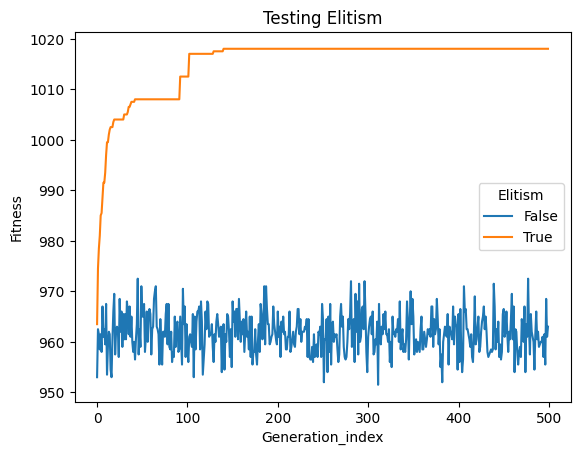

In [7]:
# Importing the results
result_elitism = pd.read_csv('GA_Elitims.csv')

# Grouping results based on the generation and Elitism  and calculate the median
result_elitism = result_elitism[['Elitism', 'Fitness', 'Generation_index']].groupby(['Generation_index', 'Elitism']).median()

# Plot the results
sns.lineplot(data=result_elitism, x = 'Generation_index', y = 'Fitness', hue = 'Elitism')
plt.title("Testing Elitism")
plt.show()


Conclusion: Using elitism is better. So, we will use it.

### Population size and number of generations

300 combinations to test; approximately 3 hours to run.

In [59]:
#colum_names = ["Seed", "Fitness Function", "Generation_index",
#               "Population_size", "Number_of_generations",
#               "Elitism", "Dataset", "Crosover",
#               "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_Population size.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"]],

#              'Crosovers': [[CX, "CX"]],

#              'Selections': [[Fitness_Proportional_Selection, "Fit_Proportional"]],

#              'Mutations': [[swap, "Swap"]],

#              'Seeds': list(range(0, 30)),

#              'Population_size': list(range(100, 1001, 100)),

#              'Number_of_generations': [1000],

#              'P_crosover': [0.9],

#              'Elitism': [True]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

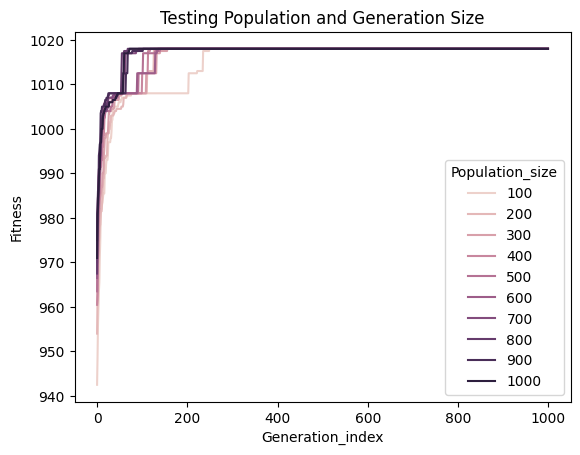

In [60]:
# Importing the results
result_pop_size = pd.read_csv('GA_Population_size.csv')

# Grouping results based on the generation and Population_size  and calculate the median
result_pop_size_gruped = result_pop_size[['Population_size', 'Fitness', 'Generation_index']].groupby(['Generation_index', 'Population_size']).median()

# Plot the results
sns.lineplot(data=result_pop_size_gruped, x = 'Generation_index', y = 'Fitness', hue='Population_size', legend='full')
plt.title("Testing Population and Generation Size")
plt.show()

# Importing the results
# Grouping results based on the generation and Elitism  and calculate the median
# Plot the results

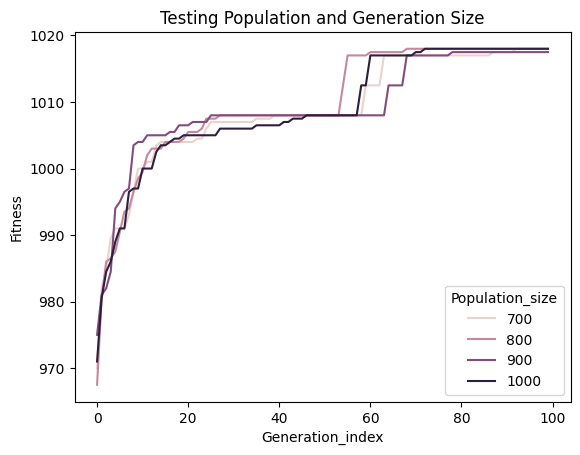

In [61]:
# Filtering to obtaing Population_size > 600 and Generation_index < 100. To look closer
result_pop_size_100generations = result_pop_size[(result_pop_size['Population_size'] > 600) & (result_pop_size['Generation_index'] < 100)]

# Grouping results based on the generation and Population_size  and calculate the median
result_pop_size_100generations = result_pop_size_100generations[['Population_size', 'Fitness', 'Generation_index']].groupby(['Generation_index', 'Population_size']).median()

# Plot the results
sns.lineplot(data=result_pop_size_100generations, x = 'Generation_index', y = 'Fitness', hue='Population_size', legend='full')
plt.title("Testing Population and Generation Size")
plt.show()


Conclusion: 
+ **Population Size :** The larger the population size, the faster the maximum is reached and the more solutions are tested. We will use population size = 800, because it gives good results and is not so large as 900 or 1000 are. 
+ **Number of Generations:** in 300 generations fitness stop improving (exploration phase), but we will use 500 generations to add margin of error, since the convergence of the fitness will depend on the matrix of distance used, ensuring the existence of an exploitation phase.


### Probability of Crossover

360 combinations to test; approximately 4 hours to run.

In [62]:
#colum_names = ["Seed", "Fitness Function", "Generation_index",
#               "Population_size", "Number_of_generations",
#               "Elitism", "Dataset", "Crosover",
#               "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_p_xo.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"]],

#              'Crosovers': [[CX, "CX"], [OX, "OX"], [PBX, "PBX"]],

#              'Selections': [[Fitness_Proportional_Selection, "Fit_Proportional"]],

#              'Mutations': [[swap, "Swap"]],

#              'Seeds': list(range(0, 30)),

#              'Population_size': [800],

#              'Number_of_generations': [500],

#              'P_crosover': [0.3, 0.5, 0.7, 0.9],

#              'Elitism': [True]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

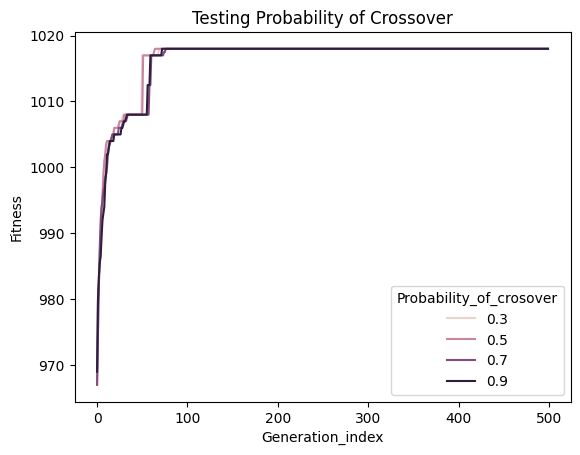

In [63]:
# Importing the results
result_p_xo = pd.read_csv('GA_p_xo.csv')

# Grouping results based on the generation and Probability_of_crosover and calculate the median
result_p_xo = result_p_xo[['Probability_of_crosover', 'Fitness', 'Generation_index']].groupby(['Generation_index', 'Probability_of_crosover']).median()

# Plot the results
sns.lineplot(data=result_p_xo, x = 'Generation_index', y = 'Fitness', hue = 'Probability_of_crosover')
plt.title("Testing Probability of Crossover")
plt.show()


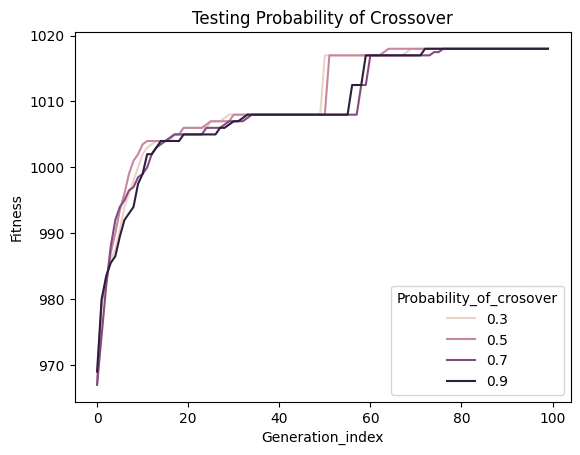

In [64]:
result_p_xo = result_p_xo.reset_index()

# Filtering Generation_index < 100, to take a closer look and plot the results
sns.lineplot(data=result_p_xo[result_p_xo["Generation_index"] < 100], x = 'Generation_index', y = 'Fitness', hue = 'Probability_of_crosover')
plt.title("Testing Probability of Crossover")
plt.show()

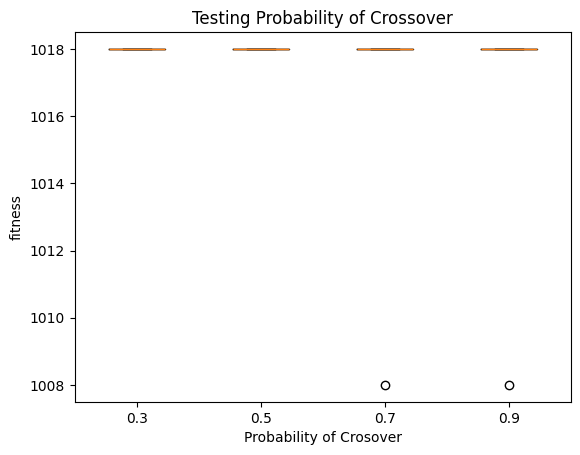

In [65]:
# Importing the results
result_p_xo_last_seed = pd.read_csv('GA_p_xo.csv')
# Grouping results based on the seed and Probability_of_crosover and calculate the last result (last generation_index)
result_p_xo_last_seed = result_p_xo_last_seed[['Fitness','Probability_of_crosover', 'Seed']].groupby(['Probability_of_crosover', 'Seed']).last().reset_index()

# Plot the distributions
plt.boxplot([result_p_xo_last_seed[ result_p_xo_last_seed['Probability_of_crosover'] == 0.3]['Fitness'], 
             result_p_xo_last_seed[ result_p_xo_last_seed['Probability_of_crosover'] == 0.5]['Fitness'],
            result_p_xo_last_seed[ result_p_xo_last_seed['Probability_of_crosover'] == 0.7]['Fitness']
            ,result_p_xo_last_seed[ result_p_xo_last_seed['Probability_of_crosover'] == 0.9]['Fitness']], 
            labels= ["0.3","0.5","0.7","0.9"])
plt.xlabel('Probability of Crosover')
plt.title("Testing Probability of Crossover")
plt.ylabel('fitness')
plt.show()


Conclusion: All results are good, but because the 0.7 and 0.9 had outliers in some generations with bad results we will use probability of crossover = 0.5, given a 50% chance of doing crossover. Since mutation is always applied we still we have variability of the individuals in the offspring population.

### Fitness Function and Selection

300 combinations to test; approximately 24 hours to run.

In [66]:
#colum_names = ["Seed", "Fitness Function", "Generation_index",
#               "Population_size", "Number_of_generations",
#               "Elitism", "Dataset", "Crosover",
#               "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_fitness_selection.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"],
#                          [Fitness_Population(True, True), "Sharing mean"]],

#              'Crosovers': [[CX, "CX"]],

#              'Selections': [[Fitness_Proportional_Selection, "Fit_Proportional"], 
#                             [rank_selection, "Rank"], [Tournament_Selection(2), "Tournament 2"],
#                             [Tournament_Selection(5), "Tournament 5"], [Tournament_Selection(10), "Tournament 10"],
#                             [Self_Adaptive_Tournament_Selection(25), "Self_Adaptive_Tournament 25"],
#                             [Self_Adaptive_Tournament_Selection(50), "Self_Adaptive_Tournament 50"]],

#              'Mutations': [[swap, "Swap"]],

#              'Seeds': list(range(0, 15)),

#              'Population_size': [800],

#              'Number_of_generations': [500],

#              'P_crosover': [0.5],

#              'Elitism': [True]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

This grid search is divided because sharing sum cannot be combined with fitness Roullet selection (fitness proportional selection), since it was considering some observations with probability = 0.

In [67]:
#file_name = "GA_fitness_selection.csv"

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"]],

#              'Fitness': [[Fitness_Population(True, False), "Sharing sum"]],

#              'Crosovers': [[CX, "CX"]],

#              'Selections': [[rank_selection, "Rank"], [Tournament_Selection(2), "Tournament 2"],
#                             [Tournament_Selection(5), "Tournament 5"], [Tournament_Selection(10), "Tournament 10"],
#                             [Self_Adaptive_Tournament_Selection(25), "Self_Adaptive_Tournament 25"],
#                             [Self_Adaptive_Tournament_Selection(50), "Self_Adaptive_Tournament 50"]],

#              'Mutations': [[swap, "Swap"]],

#              'Seeds': list(range(0, 15)),

#              'Population_size': [800],

#              'Number_of_generations': [500],

#              'P_crosover': [0.5],

#              'Elitism': [True]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

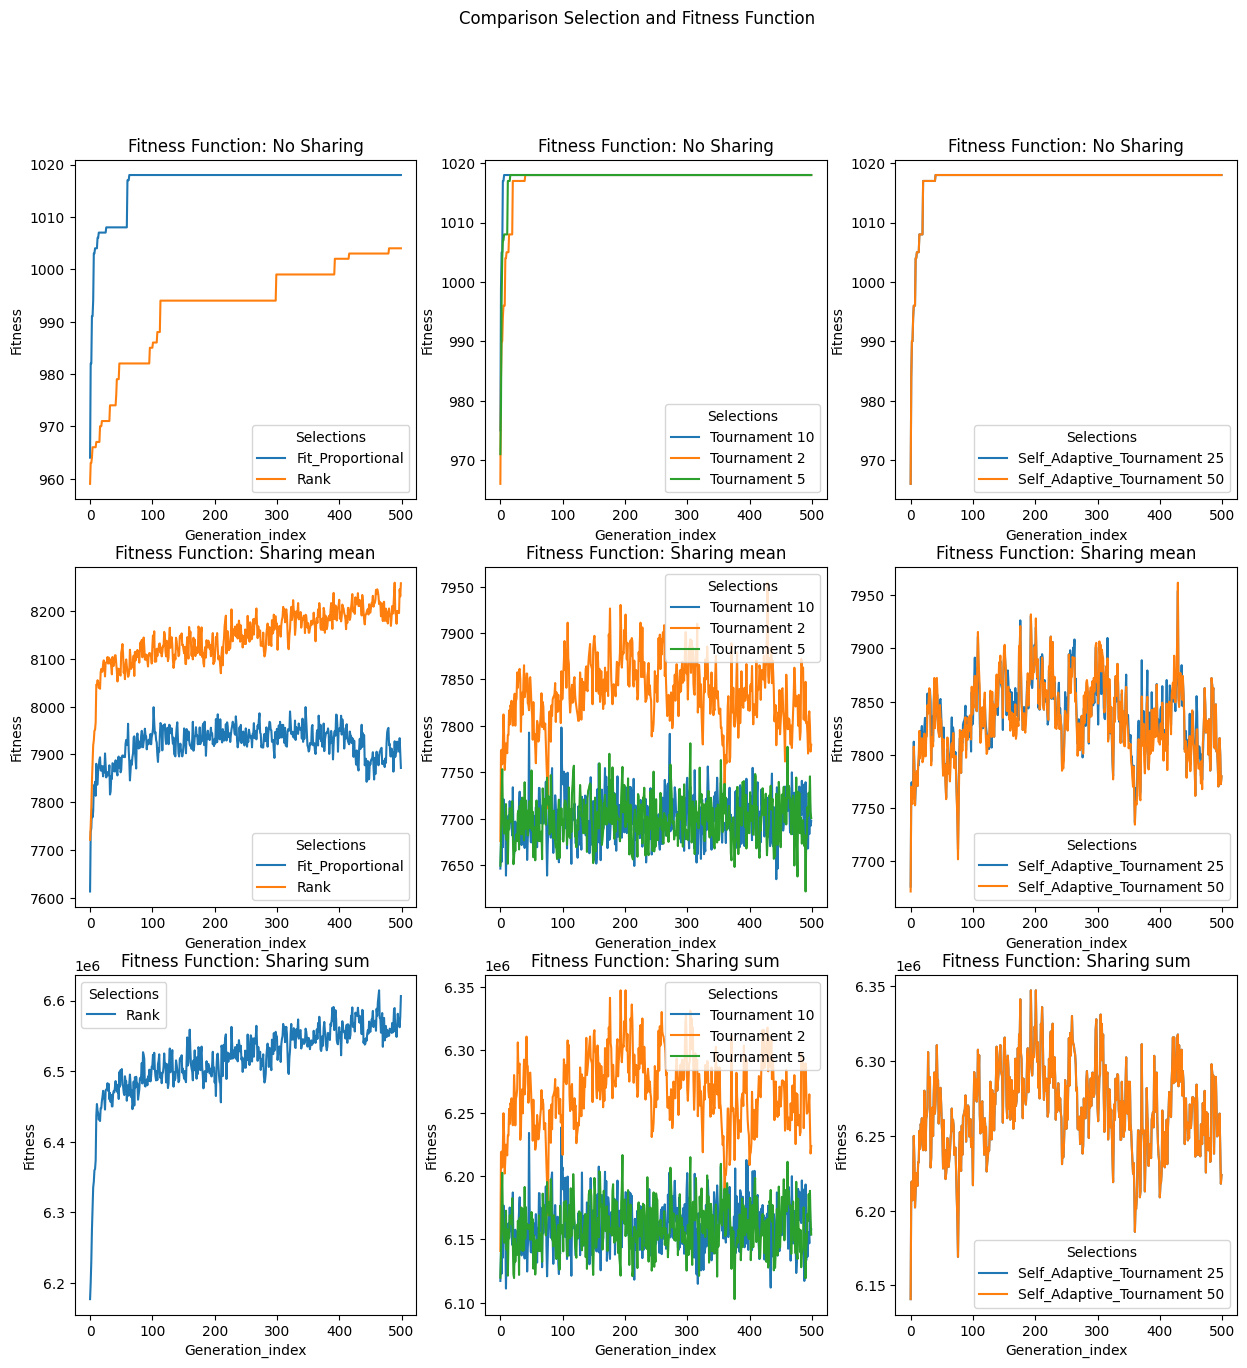

In [68]:
# Importing the results
result_fitness_selection = pd.read_csv('GA_fitness_selection.csv')

# Grouping results based on the generation, Fitness Function and Selections and calculate the median.
result_fitness_selection_grouped = result_fitness_selection[['Fitness Function', 'Fitness', 'Generation_index', 'Selections']].groupby(['Generation_index', 'Fitness Function', 'Selections']).median()
result_fitness_selection_grouped = result_fitness_selection_grouped.reset_index()

# Creates a 3x3 image
fig, axes= plt.subplots(3,3, figsize=(15,15))

# Goes to each Fitness Function
for i_row, fitness_name in enumerate(result_fitness_selection_grouped['Fitness Function'].unique()):
    # Goes to each selections (that are grupped to see better the results)
    for i_col, selections in enumerate([['Fit_Proportional','Rank'], ['Tournament 2', 'Tournament 5', 'Tournament 10'], ['Self_Adaptive_Tournament 25', 'Self_Adaptive_Tournament 50']]):

        # Select the desire values
        mask_fitness = (result_fitness_selection_grouped['Fitness Function'] == fitness_name) & (result_fitness_selection_grouped['Selections'].isin(selections))
        # Plot the results
        sns.lineplot(data=result_fitness_selection_grouped[mask_fitness], x = 'Generation_index', y = 'Fitness', hue='Selections', legend='full', ax=axes[i_row][i_col])
        axes[i_row][i_col].set_title(f"Fitness Function: {fitness_name}")
        
fig.suptitle("Comparison Selection and Fitness Function")
plt.show()


Above we have the results with their respective fitness function, seen that using the sharing fitnesses the algorithm is able to escape local optimal, but we need to compare if the final result is really the best local optimal, so we need to transform the solutions to their normal fitness value and compare with the same measure.

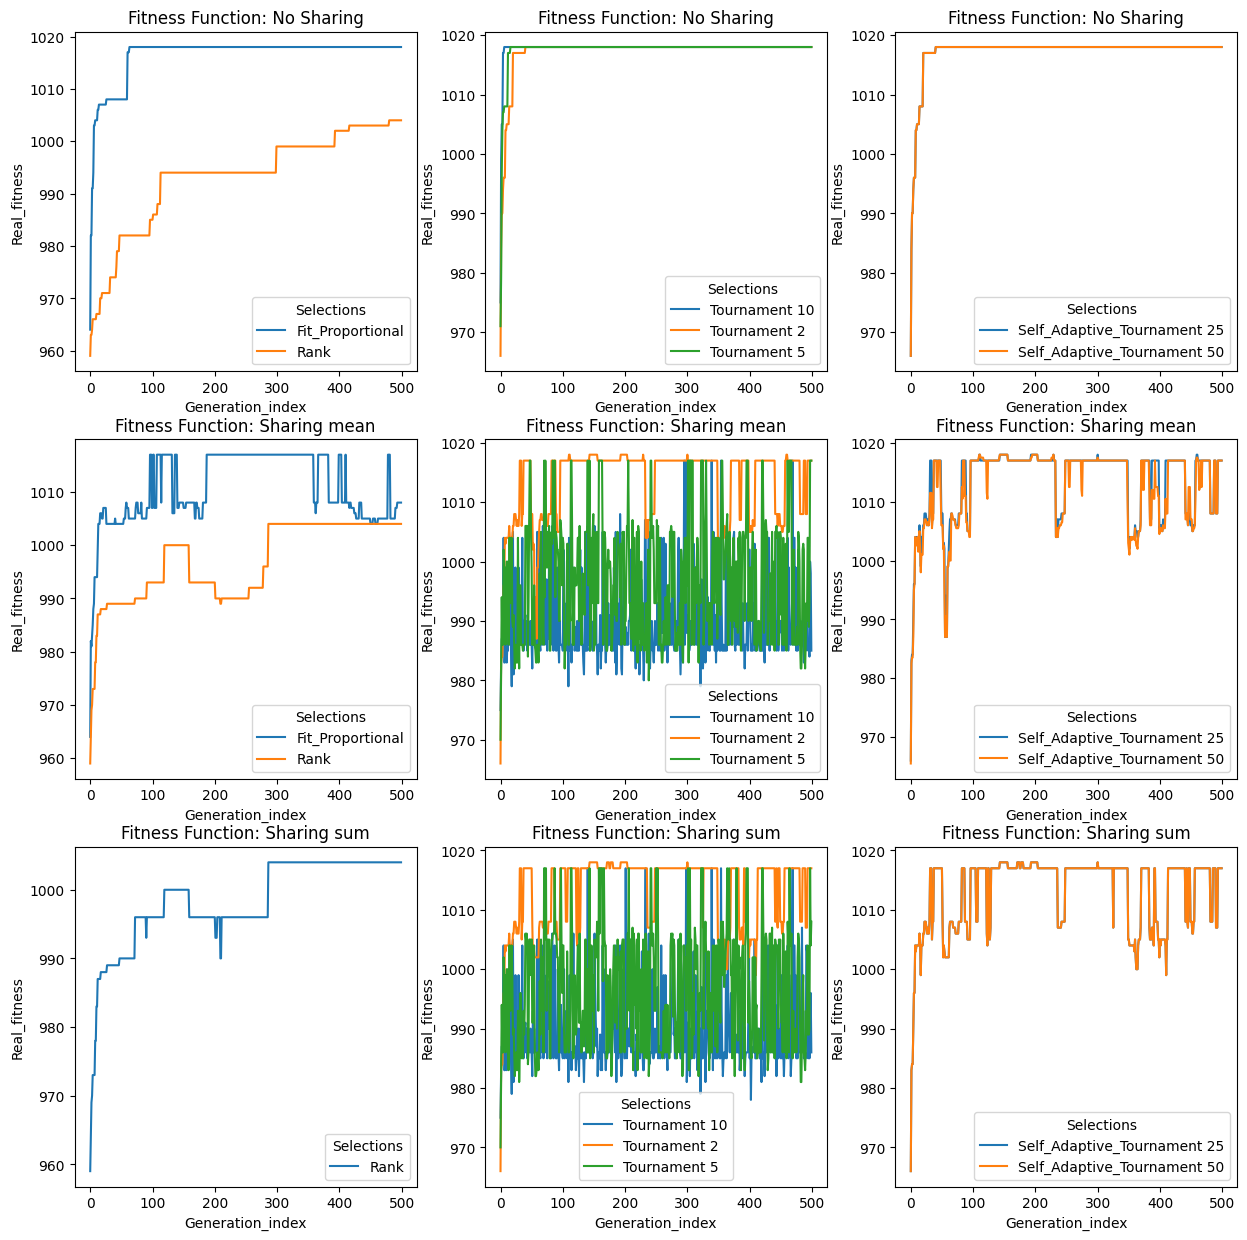

In [69]:
fitnessess = []

# Best_Solution is saved as a string, so we need to trasnform it to optaing a list of strings and them calculate the fitness
# Is needed to remove spaces, brackets and quotes, them create the list spliting by commas.
for indexx, value in result_fitness_selection["Best_Solution"].items():
    fitnessess.append(Fitness_individual(value.replace(" ", '').replace("'", '').replace("[", '').replace("]", '').split(","),
                                         None, player_dataset, False, False))

# Create a new column with the fitness in the same scale
result_fitness_selection['Real_fitness'] = fitnessess

# Grouping results based on the generation, Fitness Function and Selections and calculate the median.
result_fitness_selection_real_grouped = result_fitness_selection[['Fitness Function', 'Real_fitness', 'Generation_index', 'Selections']].groupby(['Generation_index', 'Fitness Function', 'Selections']).median()
result_fitness_selection_real_grouped = result_fitness_selection_real_grouped.reset_index()

# Creates a 3x3 image
fig, axes= plt.subplots(3,3, figsize=(15,15))

# Goes to each Fitness Function
for i_row, fitness_name in enumerate(result_fitness_selection_real_grouped['Fitness Function'].unique()):
    # Goes to each selections (that are grupped to see better the results)
    for i_col, selections in enumerate([['Fit_Proportional','Rank'], ['Tournament 2', 'Tournament 5', 'Tournament 10'], ['Self_Adaptive_Tournament 25', 'Self_Adaptive_Tournament 50']]):

        # Select the desire values
        mask_fitness = (result_fitness_selection_real_grouped['Fitness Function'] == fitness_name) & (result_fitness_selection_real_grouped['Selections'].isin(selections))
        # Plot the results
        sns.lineplot(data=result_fitness_selection_real_grouped[mask_fitness], x = 'Generation_index', y = 'Real_fitness', hue='Selections', legend='full', ax=axes[i_row][i_col])
        axes[i_row][i_col].set_title(f"Fitness Function: {fitness_name}")
        
plt.show()


After looking at the results of the fitness functions is clear that using sharing fitness will allow us to escape local optimal, but doesn’t guarantee that the last result, the one that will be delivered, is the best. For that reason, we will use the fitness no sharing function.

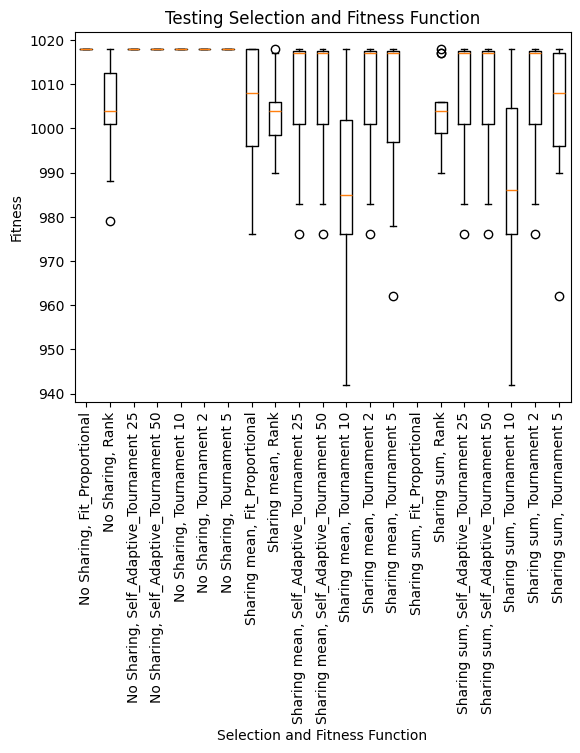

In [70]:
# Importing the results
result_fitness_selection_last_seed = pd.read_csv('GA_fitness_selection.csv')

# Create a new column with the fitness in the same scale
result_fitness_selection_last_seed['Real_fitness'] = fitnessess

# Grouping results based on the seed, Fitness Function and Selections and calculate the last result (last generation_index)
result_fitness_selection_last_seed = result_fitness_selection_last_seed[['Real_fitness','Fitness Function', 'Selections', 'Seed']].groupby(['Fitness Function','Selections', 'Seed']).last().reset_index()


boxplot_data = []
lab = []

# Goes to each Fitness Function
for  fit_funct in result_fitness_selection_last_seed['Fitness Function'].unique():
    # Goes to each selections
    for selec in result_fitness_selection_last_seed['Selections'].unique():

        # Appends the result of each unique combination Fitness Function : Selection
        boxplot_data.append(result_fitness_selection_last_seed[(result_fitness_selection_last_seed['Fitness Function'] == fit_funct) & (result_fitness_selection_last_seed['Selections'] == selec)]['Real_fitness'])
        # Save the name of the combination
        lab.append(f"{fit_funct}, {selec}")

# Plot the distributions
plt.boxplot(boxplot_data, labels= lab)
plt.xlabel('Selection and Fitness Function')
plt.ylabel('Fitness')
plt.title("Testing Selection and Fitness Function")
plt.xticks(rotation = 90)
plt.show()


Consider only the distributions of the fitness function with no sharing we see that the results for fitness proportional, tournament selection and self-adaptive tournament selection are almost the same. We discard fitness proportional for being sensitive to the scale and extreme fitnesses and decide to choose the Self-adaptive tournament 25 because it considers the distribution of the fitnesses, applying bigger selection pressure when the fitnesses are different and less selection pressure when the fitness are close together; we don’t consider Self-adaptive tournament 50 because it has the same results as 25.

Conclusion: We will use fitness function = No sharing, and selection = Self-adaptive tournament 25

### Best Parameters (Crossover and Mutation)

1650 combinations to test; approximately 4 days to run.

In [71]:
#colum_names = ["Seed", "Fitness Function", "Generation_index",
#               "Population_size", "Number_of_generations",
#               "Elitism", "Dataset", "Crosover",
#               "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_best_parameters_no_cx.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"], [random_dataset, "random"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"]],

#              'Crosovers': [[OBX, "OBX"], [OX, "OX"],
#                            [PBX, "PBX"], [PMX, "PMX"]],  

#              'Selections': [[Self_Adaptive_Tournament_Selection(25), "Self_Adaptive_Tournament 25"]],

#              'Mutations': [[displacement(2), "Displacement 2"], [displacement(3), "Displacement 3"],
#                            [displacement(4), "Displacement 4"], [displacement(5), "Displacement 5"],
#                            [scramble, "Scramble"], [swap, "Swap"], [invert_0point, "invert_0point"],
#                            [invert_1point, "invert_1point"], [Thrors(3), "Thrors 3"], 
#                            [Thrors(4), "Thrors 4"], [Thrors(5), "Thrors 5"]], 

#              'Seeds': list(range(0, 15)),

#              'Population_size': [800],

#              'Number_of_generations': [500],

#              'P_crosover': [0.5],

#              'Elitism': [True]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

We were force to do this division with and without CX crossover because if not the csv file generates an error.

In [ ]:
#colum_names = ["Seed", "Fitness Function", "Generation_index",
#               "Population_size", "Number_of_generations",
#               "Elitism", "Dataset", "Crosover",
#               "Probability_of_crosover", "Mutations",
#               "Selections", "Fitness", "Best_Solution"]

#file_name = "GA_best_parameters_no_cx.csv"

#with open(file_name, 'a', newline='') as file:
#    writer = csv.writer(file)
#    writer.writerow(colum_names)

# Define the parameters to test
#param_grid = {'Datasets': [[player_dataset, "player"], [random_dataset, "random"]],

#              'Fitness': [[Fitness_Population(False, False), "No Sharing"]],

#              'Crosovers': [[CX, "CX"]],  

#              'Selections': [[Self_Adaptive_Tournament_Selection(25), "Self_Adaptive_Tournament 25"]],

#              'Mutations': [[displacement(2), "Displacement 2"], [displacement(3), "Displacement 3"],
#                            [displacement(4), "Displacement 4"], [displacement(5), "Displacement 5"],
#                            [scramble, "Scramble"], [swap, "Swap"], [invert_0point, "invert_0point"],
#                            [invert_1point, "invert_1point"], [Thrors(3), "Thrors 3"], 
#                            [Thrors(4), "Thrors 4"], [Thrors(5), "Thrors 5"]], 

#              'Seeds': list(range(0, 15)),

#              'Population_size': [800],

#              'Number_of_generations': [500],

#              'P_crosover': [0.5],

#              'Elitism': [True]}

#grid = ParameterGrid(param_grid)

#for params in grid:
#    Genetic_Algorithm(initializer=Random_Population,
#                      population_size=params["Population_size"],
#                      evaluator=params["Fitness"],
#                      dataset=params["Datasets"],
#                      generations=params["Number_of_generations"],
#                      crossover_operator=params["Crosovers"],
#                      p_xo=params["P_crosover"],
#                      mutation=params["Mutations"],
#                      selection=params["Selections"],
#                      maximization=True,
#                      elitism=params["Elitism"],
#                      verbose=False,
#                      log=file_name,
#                      seed=params["Seeds"])

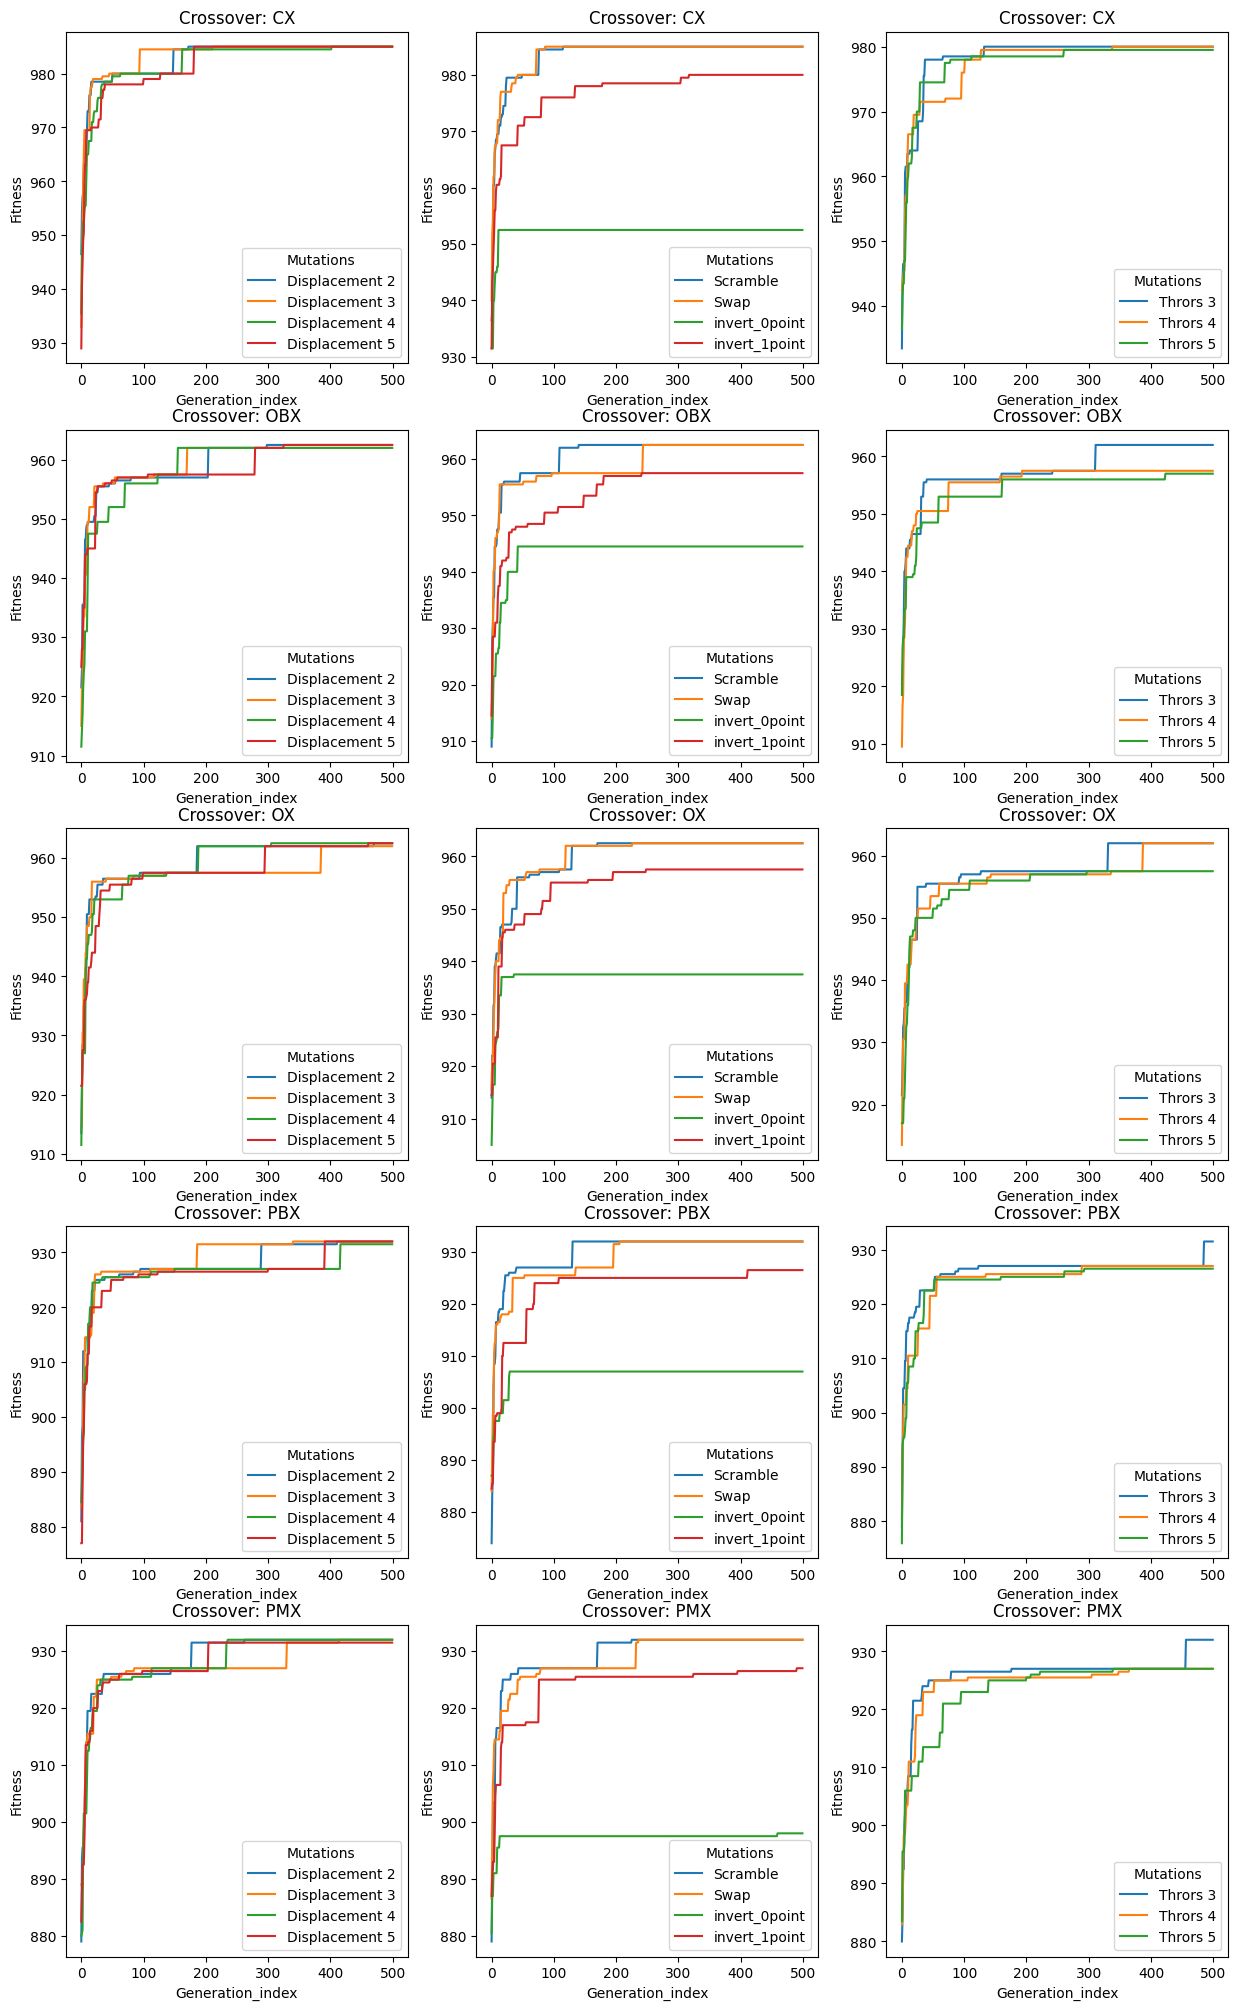

In [72]:
# Importing the results
result_best_parameters = pd.concat([pd.read_csv('GA_best_parameters_no_cx.csv'),pd.read_csv('GA_best_parameters_CX.csv')])

# Grouping results based on the generation, Crosovers and Mutations and calculate the median
result_best_parameters_grouped = result_best_parameters[['Fitness', 'Generation_index', 'Crosover', 'Mutations']].groupby(['Generation_index', 'Crosover', 'Mutations']).median()
result_best_parameters_grouped = result_best_parameters_grouped.reset_index()

# Creates a 3x3 image
fig, axes= plt.subplots(5,3, figsize=(15,25))

# Group the mutators
list_mutation_names = [['Displacement 2', 'Displacement 3', 'Displacement 4', 'Displacement 5'], ['Scramble', 'Swap', 'invert_0point', 'invert_1point'], ['Thrors 3', 'Thrors 4', 'Thrors 5']]

# Goes to each Crosovers
for i_row, crossover_name in enumerate(result_best_parameters_grouped['Crosover'].unique()):
    # Goes to each muatator (that are grupped to see better the results)
    for i_col, mutations_name in enumerate(list_mutation_names):

        # Select the desire values
        mask_crosover = (result_best_parameters_grouped['Crosover'] == crossover_name) & (result_best_parameters_grouped['Mutations'].isin(mutations_name))
        # Plot the results
        sns.lineplot(data=result_best_parameters_grouped[mask_crosover], x = 'Generation_index', y = 'Fitness', hue='Mutations', legend='full', ax=axes[i_row][i_col])
        axes[i_row][i_col].set_title(f"Crossover: {crossover_name}")

       
plt.show()


We see that overall the Crossover that manage to achieve the best results is the cycle (CX) crossover, so we will analyze it deeply.

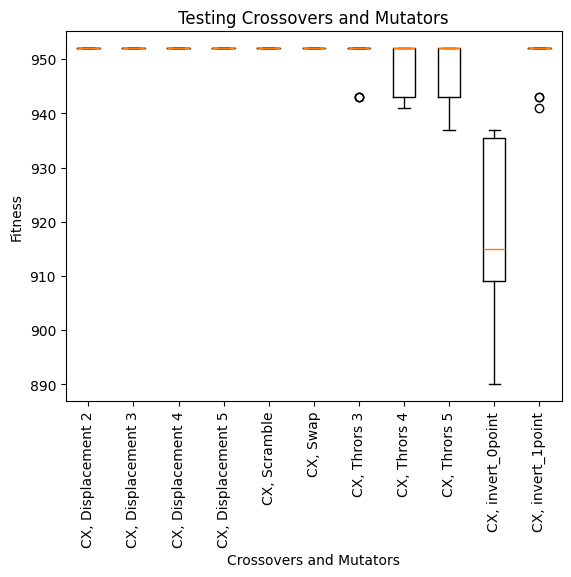

In [73]:
# Importing the results
result_best_parameters_last_seed = pd.concat([pd.read_csv('GA_best_parameters_no_cx.csv'),pd.read_csv('GA_best_parameters_CX.csv')])

# Grouping results based on the generation, Crosovers, and Mutation and calculate the median
result_best_parameters_last_seed = result_best_parameters_last_seed[['Fitness','Crosover', 'Mutations', 'Seed']].groupby(['Crosover','Mutations', 'Seed']).last().reset_index()

result_best_parameters_last_seed = result_best_parameters_last_seed[result_best_parameters_last_seed['Crosover'] == "CX"]

boxplot_data = []
lab = []

# Goes to each Crosovers
for  cross in result_best_parameters_last_seed['Crosover'].unique():
    # Goes to each Mutation
    for muta in result_best_parameters_last_seed['Mutations'].unique():

        # Appends the result of each unique combination Crosovers : Mutations
        boxplot_data.append(result_best_parameters_last_seed[(result_best_parameters_last_seed['Crosover'] == cross) & (result_best_parameters_last_seed['Mutations'] == muta)]['Fitness'])
        # Save the name of the combination
        lab.append(f"{cross}, {muta}")

# Plot the distributions
plt.boxplot(boxplot_data, labels= lab)
plt.xlabel('Crossovers and Mutators')
plt.ylabel('Fitness')
plt.title("Testing Crossovers and Mutators")
plt.xticks(rotation = 90)
plt.show()


Looking at the distribution of the last generation of the cycle crossover with the different mutators we see that Displacement 2,3,4,5, Swap and Scramble are good candidates to be the best mutator operator since they all achieve excellent results in the last generation.

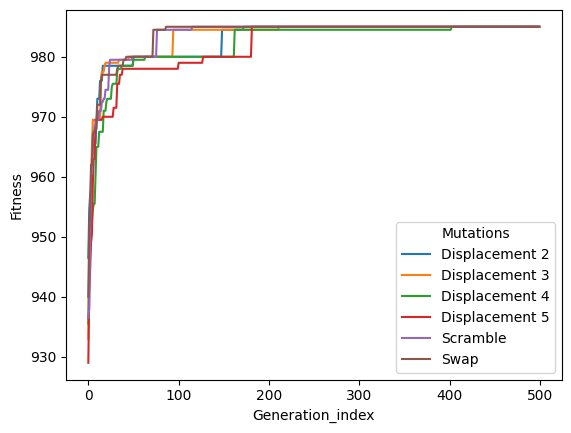

In [74]:
# Fitering the best mutators using cycle corssover
cx_best_mutations = result_best_parameters_grouped[(result_best_parameters_grouped['Crosover'] == "CX") & 
                                                     (result_best_parameters_grouped['Mutations'].isin(['Displacement 2', 'Displacement 3', 
                                                                                                          'Displacement 4', 'Displacement 5',
                                                                                                          'Scramble', 'Swap']))]


# Ploting the results
sns.lineplot(data=cx_best_mutations, x = 'Generation_index', y = 'Fitness', hue='Mutations', legend='full')
plt.show()

We see that Displacement 3, Swap and Scramble are the fastest to achieve optimal results so we will choose between those 3.

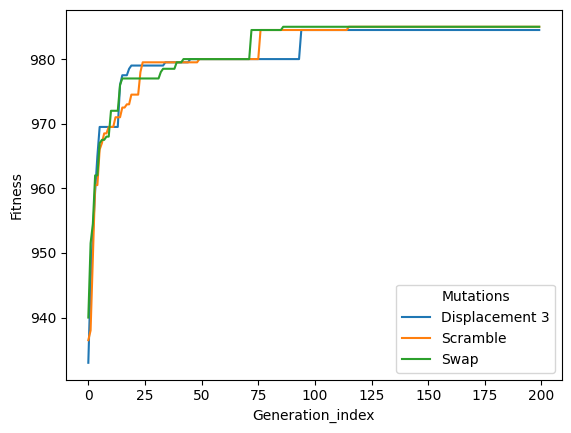

In [75]:
# Fitering the best mutators using cycle corssover
cx_best_mutations_part2 = result_best_parameters_grouped[(result_best_parameters_grouped['Crosover'] == "CX") & 
                                                     (result_best_parameters_grouped['Mutations'].isin(['Displacement 3',
                                                                                                          'Scramble', 'Swap']))]

# Ploting the results
sns.lineplot(data=cx_best_mutations_part2[cx_best_mutations_part2['Generation_index'] < 200], x = 'Generation_index', y = 'Fitness', hue='Mutations', legend='full')
plt.show()

Conclusion: The 3 options are great; we will use the swap mutator operator with the cycle crossover because is the one that achieve faster better results and is the less complex mutator operator to implement.

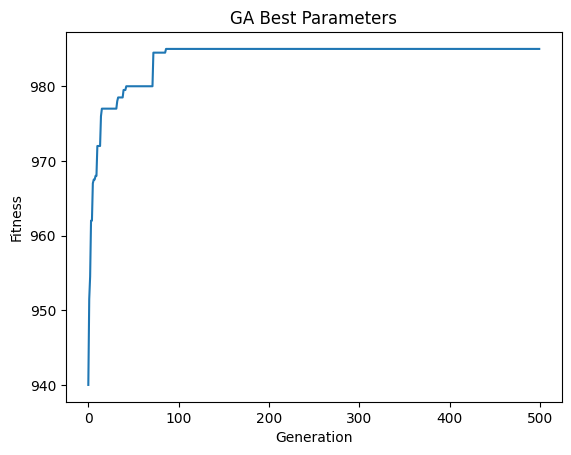

In [77]:
# Using cycle with swap
Final_parameters =  result_best_parameters_grouped[(result_best_parameters_grouped['Crosover'] == "CX") & 
                                                     (result_best_parameters_grouped['Mutations'] =='Swap')]

# Ploting the results
sns.lineplot(data=Final_parameters, x = 'Generation_index', y = 'Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title("GA Best Parameters")
plt.show()